# Explorative Data Analysis 
## Lets Make Concrete

The objective of this project is to find possibile concrete compositions that have a high compressive strength. This part is about finding what element have the biggest impact on the strength of the concrete and to understand the ranges of the data. I look to understand the range and distribution of ingredients, to aid in creating untested compositions. 

The data can be found from Kaggle (https://www.kaggle.com/competitions/dat300-2018-concrete/data)

cement type float - amount of cement

BlastFurnaceSlag - type float - amount of BlastFurnaceSlag

FlyAsh - type float - amount of FlyAsh

Water - type float - amount of Water

Superplasticizer - type float - amount of Superplasticizer

CoarseAggregate - type float - amount of CoarseAggregate

FineAggregate - type float - amount of FineAggregate

Age - type integer - age of concrete construction

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')


In [33]:
# Load the data set
df = pd.read_csv("../data/Concrete_Data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [34]:
# To make analysis easier, we will rename the columns
df.columns = ['cement', 'BG Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Compressive Strength']
df.head()

,cement,BG Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [35]:
# Lets start by checking for missing values and anomolies
df.isnull().sum()

cement                  0
BG Slag                 0
Fly Ash                 0
Water                   0
Superplasticizer        0
Coarse Aggregate        0
Fine Aggregate          0
Age                     0
Compressive Strength    0
dtype: int64

In [36]:
# The next is to understand what the data is comprised of. 
# Pandas Describe gives a quick overview of some key information
df.describe()

,cement,BG Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [37]:
df.corr()

,cement,BG Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BG Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Compressive Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


From this correlation matrix, we can see that Cement, Water,  Age and Superplasticizer have the greatest correlation to the compressive strength of the concrete.

From these 4 ingredients from describing the data we can see only Superplastizier is not vital, as some mixtures contain 0. 

As for datatypes we can see that Age is an integer. Making it a discrete value. It may be safe at this stage to say that Age is not something we are interested in when proposing new mixtures. It may have an impact on strength but unless its getting weaker over time... wait that would be interesting to know. 


<AxesSubplot:xlabel='Age', ylabel='Compressive Strength'>

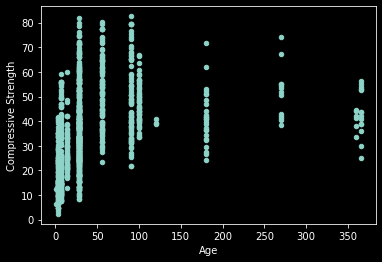

In [38]:
df.plot.scatter("Age", "Compressive Strength")

Although we can see that some of the strongest concretes are young in age, we can also see that as the concrete gets older the minimum  compressive strength increases. We also have no guage for what Age is, hours, weeks, months? With the maximuim age at 365 we can assume it is days. Compressive strength seems pretty low for those aged at day 1. We know concrete needs to set, maybe its worth excluding all data that has not set yet, it may not be a true reflection of its compressive strength. 


lets see how many compositions have only been aged 1 day.

In [52]:
df_age_1 = df[df.Age <= 2]
df_age_1.describe()

,cement,BG Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,2.00000,2.0,2.0,2.000000,2.0,2.000000,2.000000,2.0,2.00000
mean,442.50000,0.0,0.0,193.000000,0.0,1045.500000,688.000000,1.0,9.45500
std,81.31728,0.0,0.0,9.899495,0.0,112.429978,106.066017,0.0,4.50427
min,385.00000,0.0,0.0,186.000000,0.0,966.000000,613.000000,1.0,6.27000
25%,413.75000,0.0,0.0,189.500000,0.0,1005.750000,650.500000,1.0,7.86250
50%,442.50000,0.0,0.0,193.000000,0.0,1045.500000,688.000000,1.0,9.45500
75%,471.25000,0.0,0.0,196.500000,0.0,1085.250000,725.500000,1.0,11.04750
max,500.00000,0.0,0.0,200.000000,0.0,1125.000000,763.000000,1.0,12.64000


In [53]:
df_age_1

,cement,BG Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
746,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,12.64
763,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1,6.27


Interesting, there are only 2 records that are less than 2 days old. And the minimum compressive strength isn't found in these younger columns. These could be anomolies. Either way we will explore dropping the Age column when it comes to training our model. 

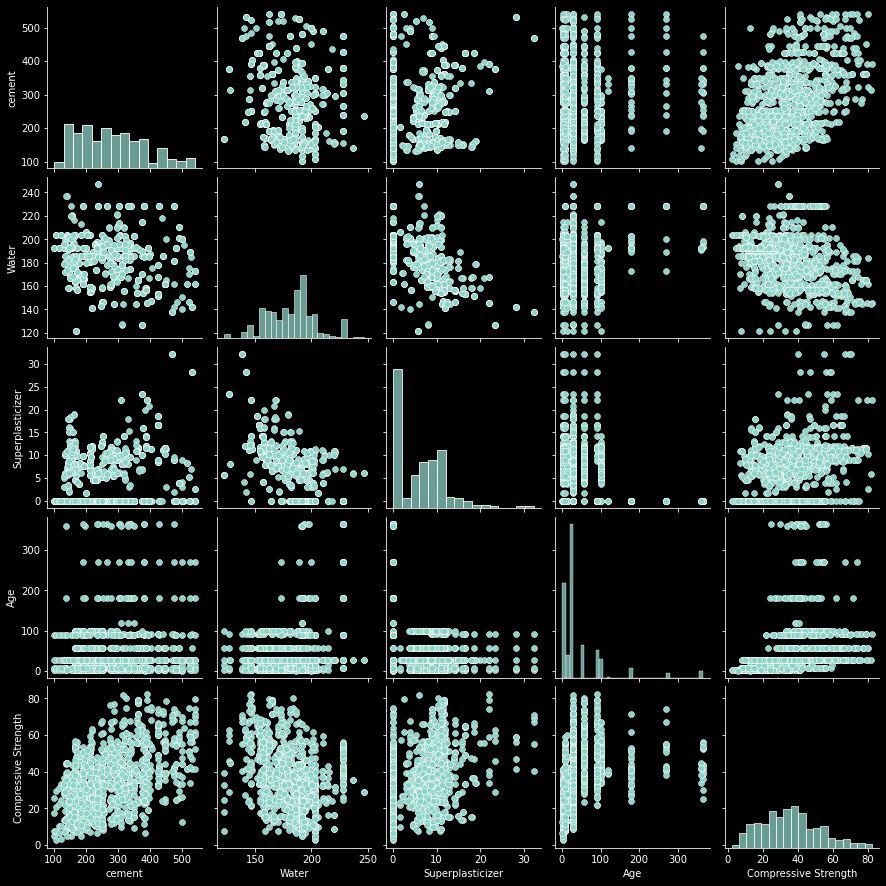

In [56]:
sns.pairplot(data=df, vars=['cement',  'Water', 'Superplasticizer', 'Age', 'Compressive Strength'])

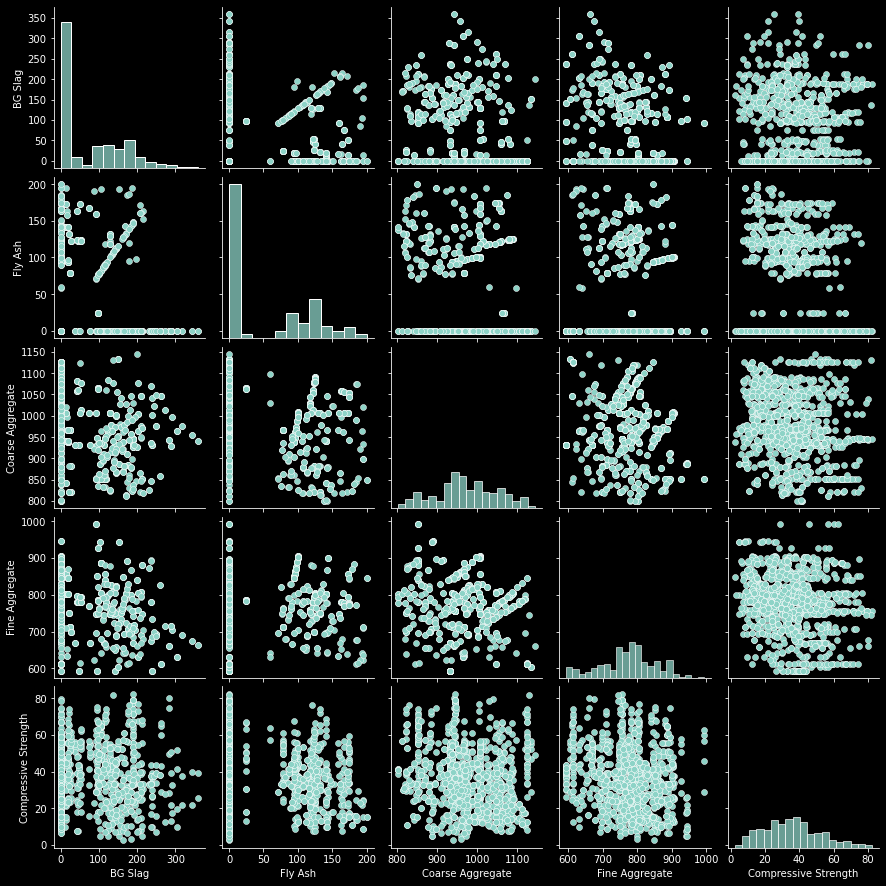

In [58]:
sns.pairplot(data=df, vars=['BG Slag', 'Fly Ash','Coarse Aggregate', 'Fine Aggregate', 'Compressive Strength'])
